In [1]:
import argparse
import math
from random import randint
import torch
from torch import nn, optim
from torchsummary import summary
from torch.utils.data import DataLoader
from data_preprocessing import Feature_Selector_Dataset
import discharge_model 
from SeversonDataset_preprocess import train_val_split
from utils import *

In [2]:
def get_args_parser():
    parser = argparse.ArgumentParser('Discharge Model Feature Selector Training', add_help=False)
    parser.add_argument('--batch_size', default=64, type=int)
    parser.add_argument('--epochs', default=200, type=int)
    parser.add_argument('--seed', default=41, type=int)
    parser.add_argument('--detail_step', default=50, type=int)

    # Model parameters
    parser.add_argument('--model_name', default='Dim_Reduction_1', type=str) 
    parser.add_argument('--pred_target', default='EOL', type=str) 
    parser.add_argument('--finetune', default=False, type=bool)   
    parser.add_argument('--checkpoint', default='.pth', type=str)                  

    # Hyperparameters
    parser.add_argument('--weight_decay', type=float, default=1e-3)
    parser.add_argument('--lr', type=float, default=5e-4, metavar='LR')
    parser.add_argument('--lr_schedule', type=bool, default=False, metavar='LR')
    parser.add_argument('--min_lr', type=float, default=5e-5, metavar='LR')
    parser.add_argument('--warm_up', type=int, default=10, metavar='LR')
    parser.add_argument('--delta', type=int, default=1)

    return parser

 -- GPU is available -- 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 500]             672
              Mish-2              [-1, 32, 500]               0
            Conv1d-3              [-1, 32, 500]           5,152
              Mish-4              [-1, 32, 500]               0
            Conv1d-5              [-1, 32, 500]           5,152
              Mish-6              [-1, 32, 500]               0
            Conv1d-7              [-1, 32, 500]           5,152
              Mish-8              [-1, 32, 500]               0
         MaxPool1d-9              [-1, 32, 250]               0
        MaxPool1d-10              [-1, 32, 250]               0
        MaxPool1d-11              [-1, 64, 125]               0
   SpatialDropout-12              [-1, 64, 125]               0
           Conv1d-13              [-1, 32, 125]          22,560
             M

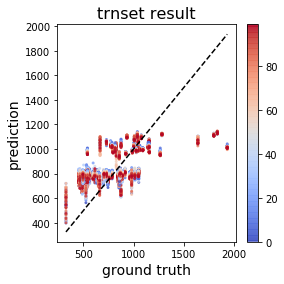

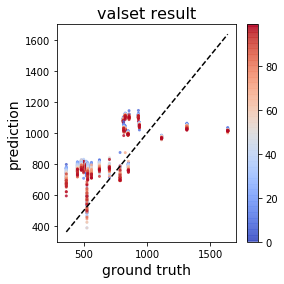

epoch:[2 / 200] batch:[50 / 144] loss: 0.673 lr: 5.000e-04
epoch:[2 / 200] batch:[100 / 144] loss: 0.386 lr: 5.000e-04
trn_loss: 0.513, val_loss: 0.536
real RMSE: 228, MAPE: 0.26


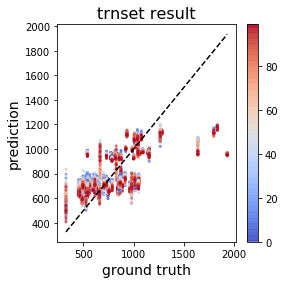

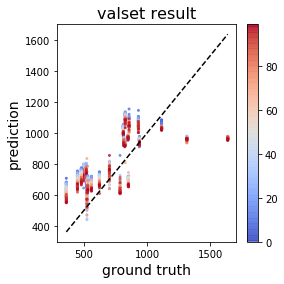

epoch:[3 / 200] batch:[50 / 144] loss: 0.526 lr: 5.000e-04
epoch:[3 / 200] batch:[100 / 144] loss: 0.569 lr: 5.000e-04
trn_loss: 0.492, val_loss: 0.539
real RMSE: 229, MAPE: 0.27
epoch:[4 / 200] batch:[50 / 144] loss: 0.364 lr: 5.000e-04
epoch:[4 / 200] batch:[100 / 144] loss: 0.315 lr: 5.000e-04
trn_loss: 0.459, val_loss: 0.560
real RMSE: 233, MAPE: 0.26
epoch:[5 / 200] batch:[50 / 144] loss: 0.360 lr: 5.000e-04
epoch:[5 / 200] batch:[100 / 144] loss: 0.460 lr: 5.000e-04
trn_loss: 0.458, val_loss: 0.608
real RMSE: 243, MAPE: 0.28
epoch:[6 / 200] batch:[50 / 144] loss: 0.316 lr: 5.000e-04
epoch:[6 / 200] batch:[100 / 144] loss: 0.455 lr: 5.000e-04
trn_loss: 0.480, val_loss: 0.613
real RMSE: 244, MAPE: 0.26
epoch:[7 / 200] batch:[50 / 144] loss: 0.580 lr: 5.000e-04
epoch:[7 / 200] batch:[100 / 144] loss: 0.472 lr: 5.000e-04
trn_loss: 0.465, val_loss: 0.478
real RMSE: 215, MAPE: 0.26


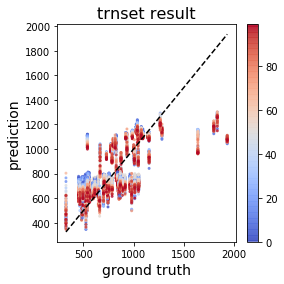

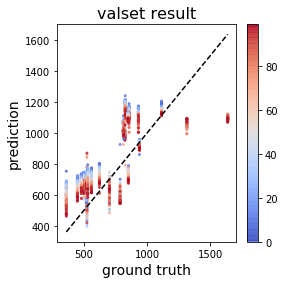

epoch:[8 / 200] batch:[50 / 144] loss: 0.534 lr: 5.000e-04
epoch:[8 / 200] batch:[100 / 144] loss: 0.292 lr: 5.000e-04
trn_loss: 0.484, val_loss: 0.639
real RMSE: 249, MAPE: 0.25
epoch:[9 / 200] batch:[50 / 144] loss: 0.220 lr: 5.000e-04
epoch:[9 / 200] batch:[100 / 144] loss: 0.423 lr: 5.000e-04
trn_loss: 0.468, val_loss: 0.586
real RMSE: 238, MAPE: 0.25
epoch:[10 / 200] batch:[50 / 144] loss: 0.577 lr: 5.000e-04
epoch:[10 / 200] batch:[100 / 144] loss: 0.344 lr: 5.000e-04
trn_loss: 0.525, val_loss: 0.507
real RMSE: 222, MAPE: 0.23
epoch:[11 / 200] batch:[50 / 144] loss: 0.304 lr: 5.000e-04
epoch:[11 / 200] batch:[100 / 144] loss: 0.154 lr: 5.000e-04
trn_loss: 0.463, val_loss: 0.472
real RMSE: 214, MAPE: 0.21


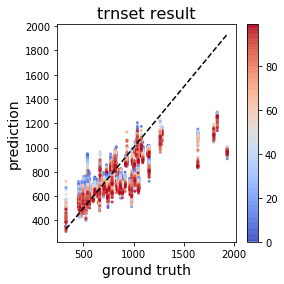

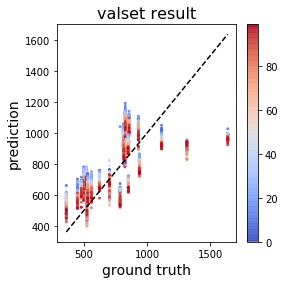

epoch:[12 / 200] batch:[50 / 144] loss: 0.352 lr: 5.000e-04
epoch:[12 / 200] batch:[100 / 144] loss: 0.465 lr: 5.000e-04
trn_loss: 0.393, val_loss: 0.555
real RMSE: 232, MAPE: 0.25
epoch:[13 / 200] batch:[50 / 144] loss: 0.411 lr: 5.000e-04
epoch:[13 / 200] batch:[100 / 144] loss: 0.507 lr: 5.000e-04
trn_loss: 0.380, val_loss: 0.606
real RMSE: 243, MAPE: 0.28
epoch:[14 / 200] batch:[50 / 144] loss: 0.447 lr: 5.000e-04
epoch:[14 / 200] batch:[100 / 144] loss: 0.361 lr: 5.000e-04
trn_loss: 0.439, val_loss: 0.766
real RMSE: 273, MAPE: 0.28
epoch:[15 / 200] batch:[50 / 144] loss: 0.309 lr: 5.000e-04
epoch:[15 / 200] batch:[100 / 144] loss: 0.315 lr: 5.000e-04
trn_loss: 0.410, val_loss: 0.524
real RMSE: 225, MAPE: 0.26
epoch:[16 / 200] batch:[50 / 144] loss: 0.488 lr: 5.000e-04
epoch:[16 / 200] batch:[100 / 144] loss: 0.181 lr: 5.000e-04
trn_loss: 0.410, val_loss: 0.541
real RMSE: 229, MAPE: 0.23
epoch:[17 / 200] batch:[50 / 144] loss: 0.350 lr: 5.000e-04
epoch:[17 / 200] batch:[100 / 144] 

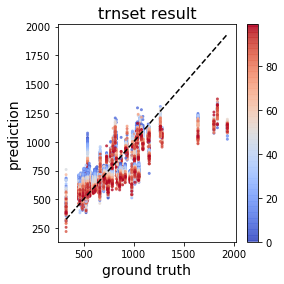

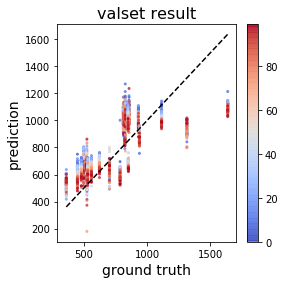

epoch:[19 / 200] batch:[50 / 144] loss: 0.295 lr: 5.000e-04
epoch:[19 / 200] batch:[100 / 144] loss: 0.479 lr: 5.000e-04
trn_loss: 0.411, val_loss: 0.447
real RMSE: 208, MAPE: 0.23
epoch:[20 / 200] batch:[50 / 144] loss: 0.306 lr: 5.000e-04
epoch:[20 / 200] batch:[100 / 144] loss: 0.376 lr: 5.000e-04
trn_loss: 0.510, val_loss: 0.710
real RMSE: 263, MAPE: 0.24
epoch:[21 / 200] batch:[50 / 144] loss: 0.287 lr: 5.000e-04
epoch:[21 / 200] batch:[100 / 144] loss: 0.268 lr: 5.000e-04
trn_loss: 0.352, val_loss: 0.647
real RMSE: 251, MAPE: 0.26
epoch:[22 / 200] batch:[50 / 144] loss: 0.234 lr: 5.000e-04
epoch:[22 / 200] batch:[100 / 144] loss: 0.177 lr: 5.000e-04
trn_loss: 0.386, val_loss: 0.558
real RMSE: 233, MAPE: 0.22
epoch:[23 / 200] batch:[50 / 144] loss: 0.369 lr: 5.000e-04
epoch:[23 / 200] batch:[100 / 144] loss: 0.261 lr: 5.000e-04
trn_loss: 0.419, val_loss: 0.581
real RMSE: 238, MAPE: 0.24
epoch:[24 / 200] batch:[50 / 144] loss: 0.437 lr: 5.000e-04
epoch:[24 / 200] batch:[100 / 144] 

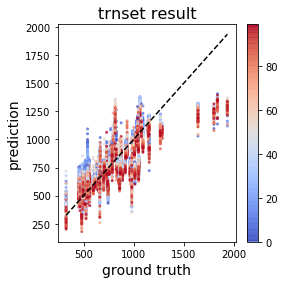

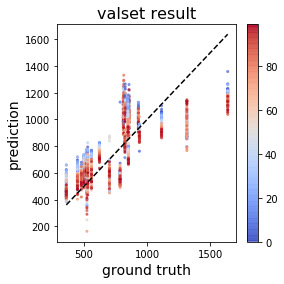

epoch:[31 / 200] batch:[50 / 144] loss: 0.253 lr: 5.000e-04
epoch:[31 / 200] batch:[100 / 144] loss: 0.293 lr: 5.000e-04
trn_loss: 0.414, val_loss: 0.573
real RMSE: 236, MAPE: 0.23
epoch:[32 / 200] batch:[50 / 144] loss: 0.317 lr: 5.000e-04
epoch:[32 / 200] batch:[100 / 144] loss: 0.255 lr: 5.000e-04
trn_loss: 0.372, val_loss: 0.476
real RMSE: 215, MAPE: 0.23
epoch:[33 / 200] batch:[50 / 144] loss: 0.233 lr: 5.000e-04
epoch:[33 / 200] batch:[100 / 144] loss: 0.356 lr: 5.000e-04
trn_loss: 0.374, val_loss: 0.537
real RMSE: 228, MAPE: 0.25
epoch:[34 / 200] batch:[50 / 144] loss: 0.318 lr: 5.000e-04
epoch:[34 / 200] batch:[100 / 144] loss: 0.236 lr: 5.000e-04
trn_loss: 0.331, val_loss: 0.521
real RMSE: 225, MAPE: 0.28
epoch:[35 / 200] batch:[50 / 144] loss: 0.198 lr: 5.000e-04
epoch:[35 / 200] batch:[100 / 144] loss: 0.313 lr: 5.000e-04
trn_loss: 0.372, val_loss: 0.541
real RMSE: 229, MAPE: 0.21
epoch:[36 / 200] batch:[50 / 144] loss: 0.211 lr: 5.000e-04
epoch:[36 / 200] batch:[100 / 144] 

epoch:[76 / 200] batch:[100 / 144] loss: 0.117 lr: 5.000e-04
trn_loss: 0.258, val_loss: 0.718
real RMSE: 264, MAPE: 0.27
epoch:[77 / 200] batch:[50 / 144] loss: 0.238 lr: 5.000e-04
epoch:[77 / 200] batch:[100 / 144] loss: 0.187 lr: 5.000e-04
trn_loss: 0.308, val_loss: 0.626
real RMSE: 247, MAPE: 0.23
epoch:[78 / 200] batch:[50 / 144] loss: 0.207 lr: 5.000e-04
epoch:[78 / 200] batch:[100 / 144] loss: 0.134 lr: 5.000e-04
trn_loss: 0.230, val_loss: 0.619
real RMSE: 245, MAPE: 0.26
epoch:[79 / 200] batch:[50 / 144] loss: 0.227 lr: 5.000e-04
epoch:[79 / 200] batch:[100 / 144] loss: 0.242 lr: 5.000e-04
trn_loss: 0.252, val_loss: 0.616
real RMSE: 244, MAPE: 0.25
epoch:[80 / 200] batch:[50 / 144] loss: 0.207 lr: 5.000e-04
epoch:[80 / 200] batch:[100 / 144] loss: 0.175 lr: 5.000e-04
trn_loss: 0.191, val_loss: 0.559
real RMSE: 233, MAPE: 0.23
epoch:[81 / 200] batch:[50 / 144] loss: 0.195 lr: 5.000e-04
epoch:[81 / 200] batch:[100 / 144] loss: 0.223 lr: 5.000e-04
trn_loss: 0.263, val_loss: 0.521
r

trn_loss: 0.207, val_loss: 0.594
real RMSE: 240, MAPE: 0.24
epoch:[122 / 200] batch:[50 / 144] loss: 0.092 lr: 5.000e-04
epoch:[122 / 200] batch:[100 / 144] loss: 0.084 lr: 5.000e-04
trn_loss: 0.217, val_loss: 0.537
real RMSE: 228, MAPE: 0.21
epoch:[123 / 200] batch:[50 / 144] loss: 0.245 lr: 5.000e-04
epoch:[123 / 200] batch:[100 / 144] loss: 0.115 lr: 5.000e-04
trn_loss: 0.180, val_loss: 0.534
real RMSE: 228, MAPE: 0.24
epoch:[124 / 200] batch:[50 / 144] loss: 0.289 lr: 5.000e-04
epoch:[124 / 200] batch:[100 / 144] loss: 0.173 lr: 5.000e-04
trn_loss: 0.183, val_loss: 0.508
real RMSE: 222, MAPE: 0.23
epoch:[125 / 200] batch:[50 / 144] loss: 0.265 lr: 5.000e-04
epoch:[125 / 200] batch:[100 / 144] loss: 0.132 lr: 5.000e-04
trn_loss: 0.187, val_loss: 0.637
real RMSE: 249, MAPE: 0.29
epoch:[126 / 200] batch:[50 / 144] loss: 0.130 lr: 5.000e-04
epoch:[126 / 200] batch:[100 / 144] loss: 0.165 lr: 5.000e-04
trn_loss: 0.236, val_loss: 0.507
real RMSE: 222, MAPE: 0.22
epoch:[127 / 200] batch:[

trn_loss: 0.179, val_loss: 0.549
real RMSE: 231, MAPE: 0.22
epoch:[167 / 200] batch:[50 / 144] loss: 0.112 lr: 5.000e-04
epoch:[167 / 200] batch:[100 / 144] loss: 0.087 lr: 5.000e-04
trn_loss: 0.148, val_loss: 0.492
real RMSE: 218, MAPE: 0.23
epoch:[168 / 200] batch:[50 / 144] loss: 0.171 lr: 5.000e-04
epoch:[168 / 200] batch:[100 / 144] loss: 0.112 lr: 5.000e-04
trn_loss: 0.179, val_loss: 0.629
real RMSE: 247, MAPE: 0.25
epoch:[169 / 200] batch:[50 / 144] loss: 0.074 lr: 5.000e-04
epoch:[169 / 200] batch:[100 / 144] loss: 0.076 lr: 5.000e-04
trn_loss: 0.159, val_loss: 0.681
real RMSE: 257, MAPE: 0.25
epoch:[170 / 200] batch:[50 / 144] loss: 0.067 lr: 5.000e-04
epoch:[170 / 200] batch:[100 / 144] loss: 0.074 lr: 5.000e-04
trn_loss: 0.161, val_loss: 0.560
real RMSE: 233, MAPE: 0.25
epoch:[171 / 200] batch:[50 / 144] loss: 0.138 lr: 5.000e-04
epoch:[171 / 200] batch:[100 / 144] loss: 0.159 lr: 5.000e-04
trn_loss: 0.160, val_loss: 0.518
real RMSE: 224, MAPE: 0.24
epoch:[172 / 200] batch:[

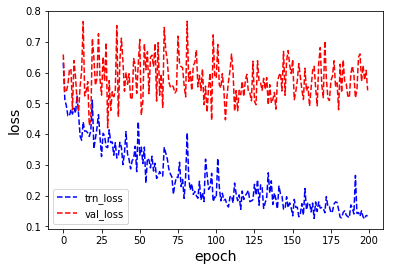

In [3]:
args = get_args_parser()
args, unknown = args.parse_known_args()
if torch.cuda.is_available():
    print(" -- GPU is available -- ")

# 根據random seed，隨機分割訓練及測試集
train_val_split(seed=args.seed)

# pytorch_dataset_preprocessing(seed=args.seed, folder='Severson_Dataset/')
trn_set = Feature_Selector_Dataset(train=True, pred_target=args.pred_target, part='discharge', norm=True)
val_set = Feature_Selector_Dataset(train=False, pred_target=args.pred_target, part='discharge', norm=True)
trn_loader = DataLoader(trn_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=True)
val_loader = DataLoader(val_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=False)

model = discharge_model.__dict__[args.model_name](4, 1, 0.2).apply(init_weights).cuda()
if args.finetune:
    model.load_state_dict(torch.load(args.checkpoint))
summary(model, (4, 500))

optimizer = optim.AdamW(model.parameters(), lr=args.lr, amsgrad=True, weight_decay=args.weight_decay)
criterion = nn.MSELoss()
# criterion = nn.HuberLoss(delta=args.delta)

best_rmse, best_mape = 1000, 1000
trn_loss_record, val_loss_record = [], []
for epoch in range(args.epochs):
    model.train()
    step = 0
    n_minibatch = math.ceil(len(trn_set)/args.batch_size)
    if args.lr_schedule:
        adjust_learning_rate(optimizer, args.epochs, epoch+1, args.warm_up, args.lr, args.min_lr)
    for inputs, targets in trn_loader:
        step += 1
        optimizer.zero_grad()
        outputs = model(inputs.cuda().float())
        loss = criterion(outputs, targets.reshape(-1, 1).cuda().float())
        loss.backward()
        optimizer.step()
        if step%args.detail_step==0:
            print('epoch:[%d / %d] batch:[%d / %d] loss: %.3f lr: %.3e' % (epoch+1, args.epochs, step, n_minibatch, loss, optimizer.param_groups[0]["lr"]))

    # model evaluation per epoch
    model.eval()
    with torch.no_grad():
        trn_loss, trn_batch = 0, 0
        for inputs, targets in trn_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            trn_loss += loss
            trn_batch += 1
        val_loss, val_batch = 0, 0
        for inputs, targets in val_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            val_loss += loss
            val_batch += 1
        trn_loss_record.append((trn_loss/trn_batch).cpu())
        val_loss_record.append((val_loss/val_batch).cpu())
        print('trn_loss: %.3f, val_loss: %.3f' % ((trn_loss/trn_batch), (val_loss/val_batch)))

    # inverse transform to real target
    val_rmse, val_mape = real_RMSE_and_MAPE(model, val_loader, args.pred_target)
    print('real RMSE: %d, MAPE: %.2f' % (val_rmse, val_mape))
    if val_rmse < best_rmse:
        best_rmse, best_mape = val_rmse, val_mape
        pred_result(model, trn_set, 'trn', args.pred_target)        
        pred_result(model, val_set, 'val', args.pred_target)
        torch.save(model.state_dict(), args.model_name+'_seed'+str(args.seed)+'.pth')

# training finished
loss_profile(trn_loss_record, val_loss_record)